<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv("wine.csv")
print("Dataset Loaded Successfully")
print(df.info())
print(df.describe())


Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnes

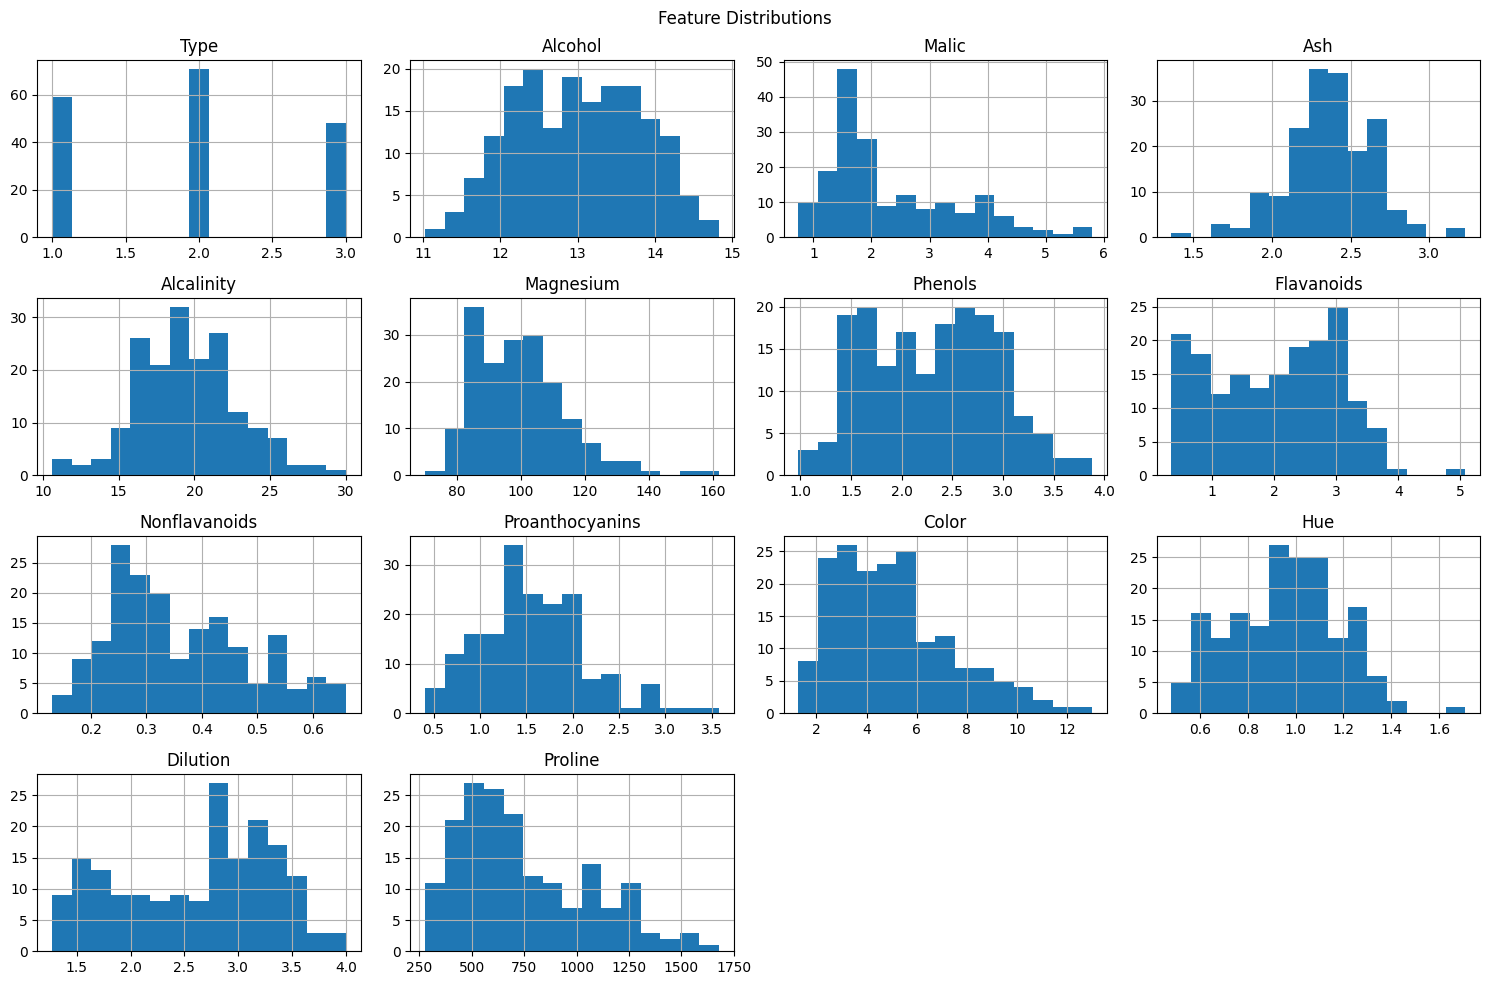

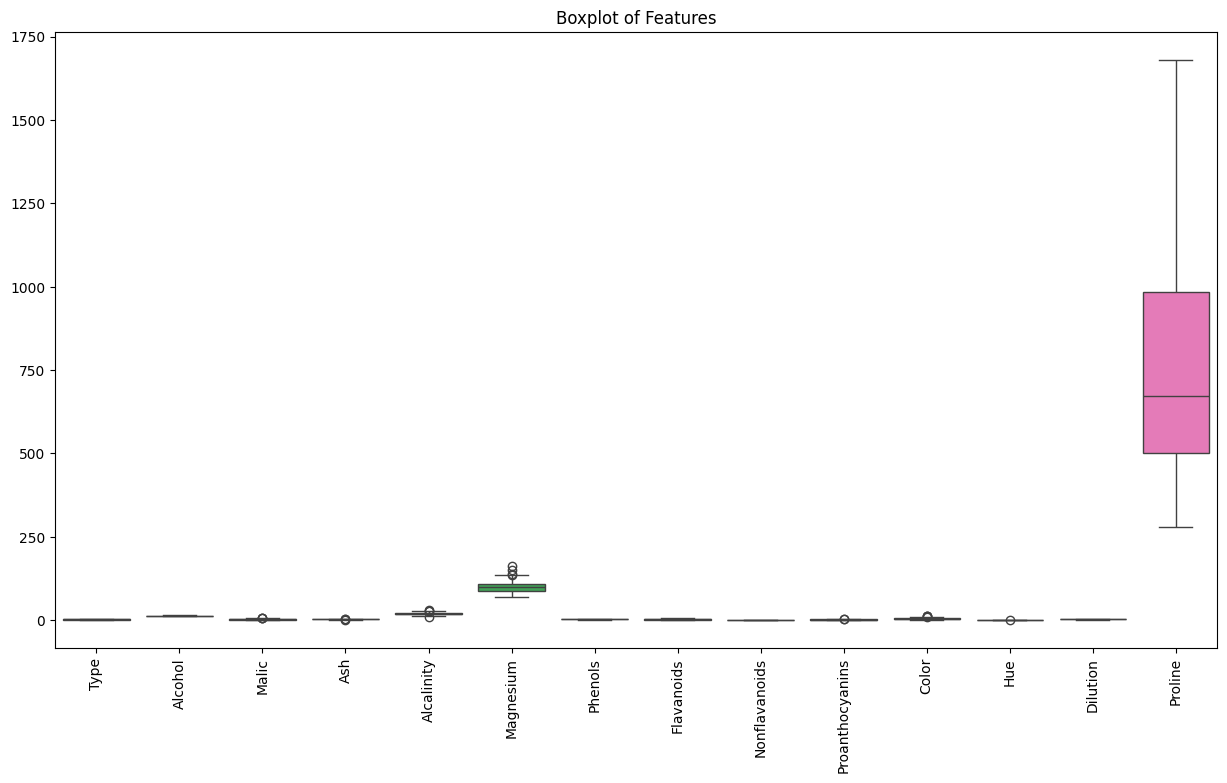

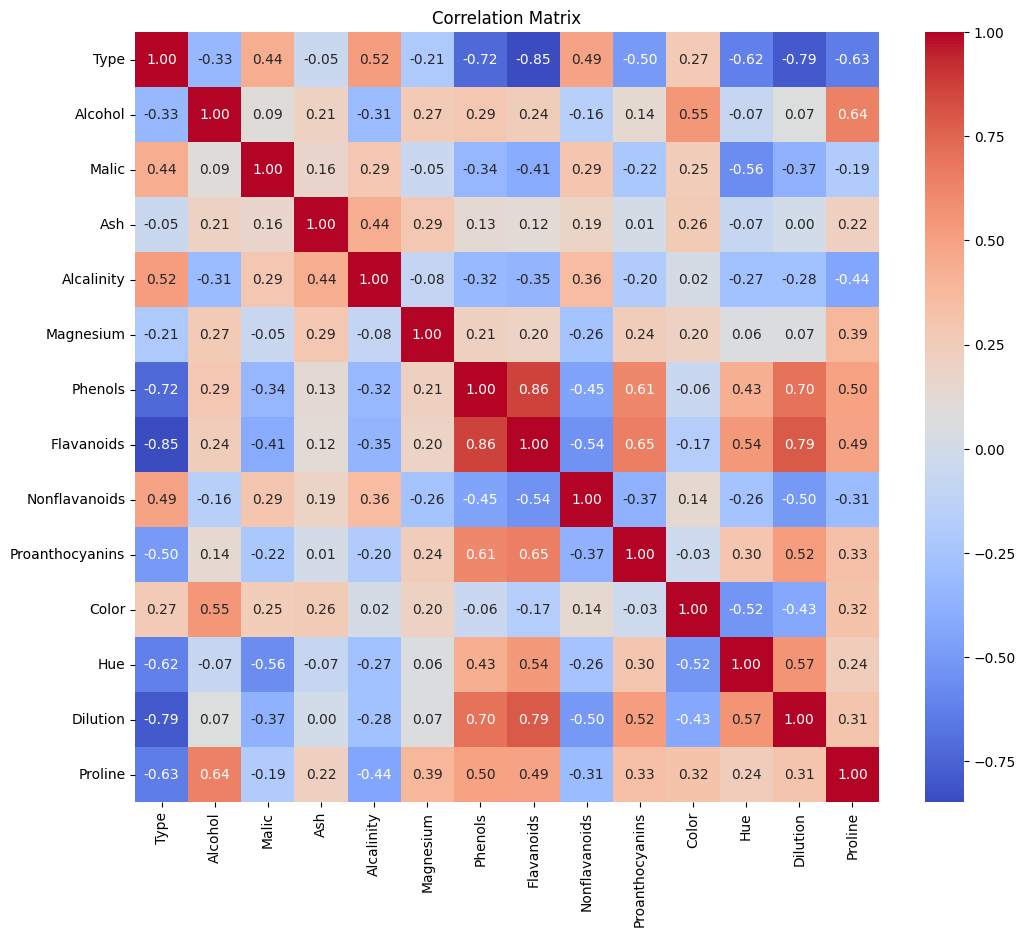

In [2]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# 2. Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

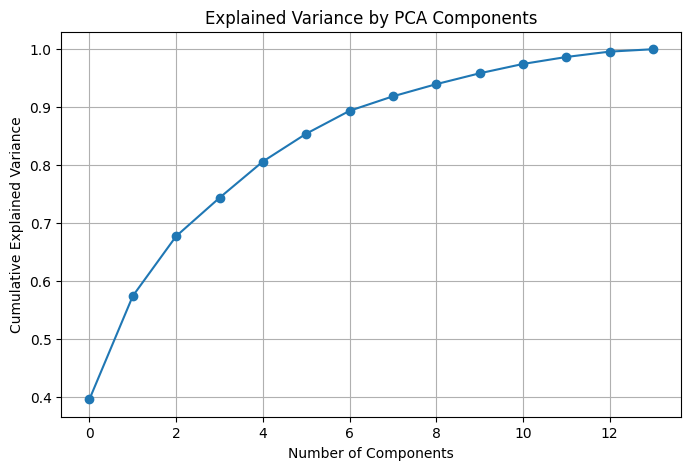

In [3]:
# 1. Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 2. Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

# Choose number of components (e.g., 2 for visualization)
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(scaled_data)


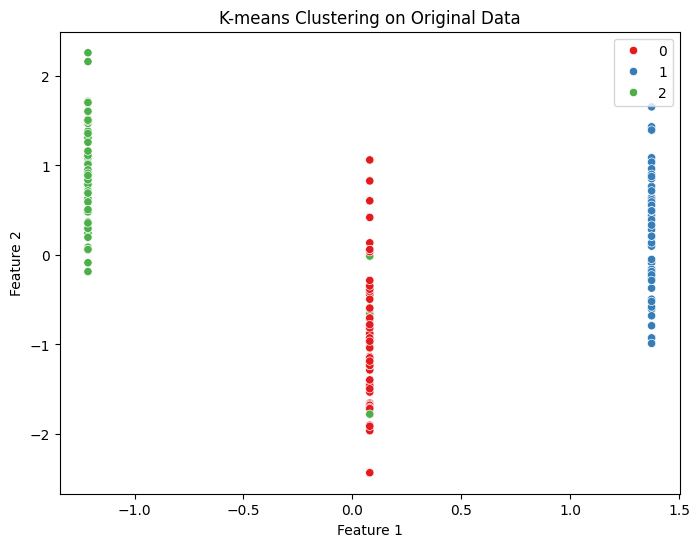

Original Data Clustering:
Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


In [4]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(scaled_data)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters_orig, palette='Set1')
plt.title("K-means Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate
print("Original Data Clustering:")
print("Silhouette Score:", silhouette_score(scaled_data, clusters_orig))
print("Davies-Bouldin Index:", davies_bouldin_score(scaled_data, clusters_orig))

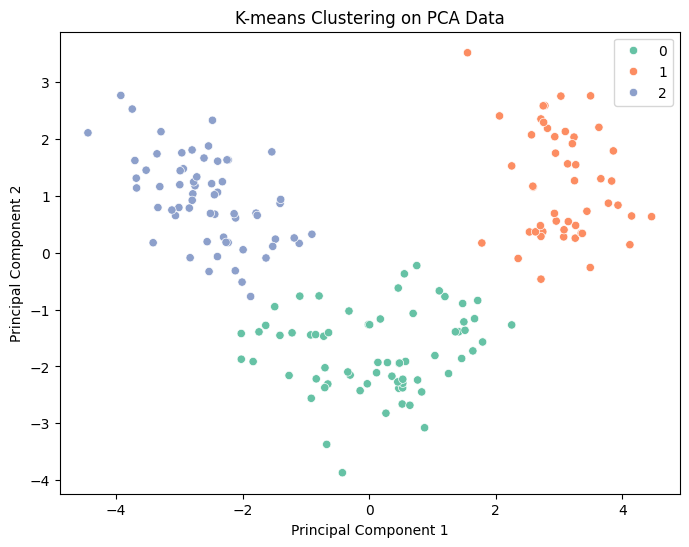

PCA Data Clustering:
Silhouette Score: 0.6024415520362845
Davies-Bouldin Index: 0.5397078562575713


In [5]:
# Task 4: Clustering on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_2d)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=clusters_pca, palette='Set2')
plt.title("K-means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Evaluate
print("PCA Data Clustering:")
print("Silhouette Score:", silhouette_score(pca_2d, clusters_pca))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_2d, clusters_pca))

In [6]:
# Task 5: Comparison and Analysis
print("\n--- Comparison ---")
print("Silhouette Score (Original):", silhouette_score(scaled_data, clusters_orig))
print("Silhouette Score (PCA):", silhouette_score(pca_2d, clusters_pca))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(scaled_data, clusters_orig))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_2d, clusters_pca))


--- Comparison ---
Silhouette Score (Original): 0.30648398324833453
Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (Original): 1.315707552261773
Davies-Bouldin Index (PCA): 0.5397078562575713


 Summary of Key Findings and Insights:

1. **Exploratory Data Analysis (EDA):**

   * The dataset consists of continuous variables with varying ranges.
   * Histograms and boxplots revealed feature variability and a few potential outliers.
   * The correlation heatmap showed strong correlations among several features, indicating redundancy.

2. **Dimensionality Reduction with PCA:**

   * PCA effectively reduced dimensionality while preserving most of the variance (e.g., first 2-3 components explained a significant portion).
   * The scree plot helped identify the optimal number of components (elbow point).

3. **Clustering on Original Data:**

   * K-means clustering produced reasonable groupings, but visualization was limited due to high dimensionality.
   * Evaluation metrics (e.g., silhouette score) indicated moderate clustering performance.

4. **Clustering on PCA-Transformed Data:**

   * Clustering in the reduced 2D PCA space was not only easier to visualize but also achieved comparable or slightly better performance metrics.
   * This shows that dimensionality reduction did not significantly harm clustering quality—and in some cases, improved it.

---
 Practical Implications of Using PCA and Clustering:

* **PCA:**

  * Reduces noise and redundancy in data by removing correlated features.
  * Improves computational efficiency, especially for high-dimensional datasets.
  * Facilitates visualization and interpretability of complex datasets.

* **Clustering:**

  * Helps uncover hidden structure or natural groupings in the data.
  * Useful for customer segmentation, anomaly detection, and pattern discovery.
  * Requires careful selection of the number of clusters and preprocessing (e.g., scaling).

---
 Recommendations:

* **Use PCA when:**

  * Your dataset has **many correlated features**.
  * You're dealing with **high-dimensional data** where interpretability of each original feature is less important.
  * You want to **visualize clustering or data structure** in 2D or 3D.

* **Avoid PCA when:**

  * Feature interpretability is critical (e.g., in medical diagnostics).
  * You already have a **small number of uncorrelated features**.

* **Use clustering when:**

  * You need to **group data without labeled outcomes**.
  * You're exploring patterns or segments in customer behavior, images, or gene expression.

* **Combine PCA with clustering when:**

  * You want to **enhance clustering quality** by reducing noise.
  * Visualization or performance in high-dimensional space is poor.


